  country  region   district  station_id        lat        lon  \
0      RU  RU-SPE  RU-SPE-13           1  59.969286  30.284625   

                     ru_name  
0  ул. Профессора Попова, 48  


,date,pm025,pm100
0,2017-01-31,6.270833,NaN
1,2017-02-28,6.222222,NaN
2,2017-03-31,5.193548,NaN
3,2017-04-30,4.200000,NaN
4,2017-05-31,5.431034,NaN
5,2017-06-30,5.068966,NaN
6,2017-07-31,5.983871,NaN
7,2017-08-31,6.435484,NaN
8,2017-09-30,5.250000,NaN
9,2017-10-31,1.866667,NaN


<Figure size 5550x3150 with 0 Axes>

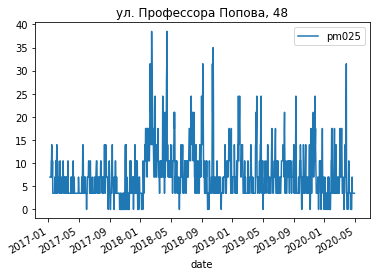

<Figure size 5550x3150 with 0 Axes>

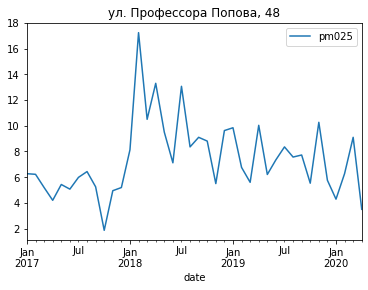

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# St.Petersburg Air Quality Data Notebook
# Vladimir Chukin <chukin@meteolab.ru>
# MeteoLab LLC, 2020


# Load data
dtypes = {'station_id': 'int', 'date': 'str', 'pm025': 'float', 'pm100': 'float'}
data = pd.read_csv("airquality-spb-data.csv", dtype=dtypes, parse_dates=["date"])
meta = pd.read_csv("airquality-spb-stations.csv")

# Set station ID [1,2,3,...,24]
station = 1

# Set parameter ID ["pm025" - PM2.5, "pm100" - PM10]
param = "pm025"

# Create dataframes for the station
df = data[data["station_id"] == station]
mf = meta[meta["station_id"] == station]
df = df.drop(["station_id"], axis=1)

# Show station information
print(mf)

# Plot daily data
plt.figure(figsize=(18.5, 10.5), dpi=300)
df.plot(x='date', y=param, title=mf.iloc[0]["ru_name"], legend="PM2.5")
plt.savefig("airquality-spb-fugure-daily.png", dpi=300)

# Get monthly mean data
df = df.set_index(["date"])
dfm = df.resample("M").mean()
df = df.reset_index()
dfm = dfm.reset_index()

# Plot mounthly mean data
plt.figure(figsize=(18.5, 10.5), dpi=300)
dfm.plot(x='date', y=param, title=mf.iloc[0]["ru_name"], legend="PM2.5")
plt.savefig("airquality-spb-figure-mounthly.png", dpi=300)

dfm